<a href="https://colab.research.google.com/github/eva057/cse_lab_courses/blob/main/ML/2125051057_7B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_dir = '/content/drive/MyDrive/ML LAB/ML_project/New folder/Dataset'

Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 99s 5s/step - accuracy: 0.2315 - loss: 1.4094 - val_accuracy: 0.2500 - val_loss: 1.3718
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.2621 - loss: 1.3807 - val_accuracy: 0.4125 - val_loss: 1.3569
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.3596 - loss: 1.3576 - val_accuracy: 0.3875 - val_loss: 1.3544
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.3912 - loss: 1.3317 - val_accuracy: 0.3875 - val_loss: 1.3288
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4231 - loss: 1.3225 - val_accuracy: 0.5500 - val_loss: 1.2855
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4208 - loss: 1.2988 - val_accuracy: 0.4875 - val_loss: 1.2505
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.5291 - loss: 1.2284 - val_accuracy: 0.5250 - val_loss: 1.1767
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.4838 - loss: 1.1872 - val_accuracy: 0.4000 - val_loss: 1.1914
Epo

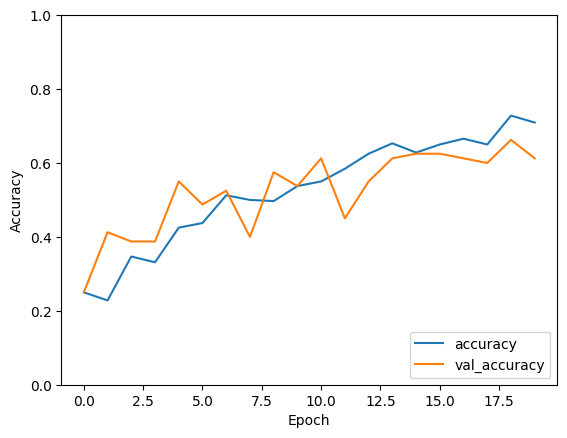

In [4]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2) # Set validation split

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training') # Set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # Set as validation data


# CNN Model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) # Dropout for regularization
model.add(Dense(train_generator.num_classes, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=20, # Adjust the number of epochs as needed
    validation_data=validation_generator)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator, verbose=0)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


# Plotting training history (optional)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
